In [2]:
file = "adult.data"
dataset = pd.read_csv(file)
dataset.head()

,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [3]:
dataset.keys()

Index(['39', ' State-gov', ' 77516', ' Bachelors', ' 13', ' Never-married',
       ' Adm-clerical', ' Not-in-family', ' White', ' Male', ' 2174', ' 0',
       ' 40', ' United-States', ' <=50K'],
      dtype='object')

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   39              32560 non-null  int64 
 1    State-gov      32560 non-null  object
 2    77516          32560 non-null  int64 
 3    Bachelors      32560 non-null  object
 4    13             32560 non-null  int64 
 5    Never-married  32560 non-null  object
 6    Adm-clerical   32560 non-null  object
 7    Not-in-family  32560 non-null  object
 8    White          32560 non-null  object
 9    Male           32560 non-null  object
 10   2174           32560 non-null  int64 
 11   0              32560 non-null  int64 
 12   40             32560 non-null  int64 
 13   United-States  32560 non-null  object
 14   <=50K          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [5]:
dataset[" Never-married"].value_counts()

 Married-civ-spouse       14976
 Never-married            10682
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name:  Never-married, dtype: int64

In [6]:
dataset.corr()

,39,77516,13,2174,0,40
39,1.000000,-0.076646,0.036527,0.077674,0.057775,0.068756
77516,-0.076646,1.000000,-0.043159,0.000437,-0.010259,-0.018770
13,0.036527,-0.043159,1.000000,0.122627,0.079932,0.148127
2174,0.077674,0.000437,0.122627,1.000000,-0.031614,0.078409
0,0.057775,-0.010259,0.079932,-0.031614,1.000000,0.054256
40,0.068756,-0.018770,0.148127,0.078409,0.054256,1.000000


In [7]:
from sklearn.preprocessing import OrdinalEncoder

In [8]:
Never_married = dataset[" Never-married"]
Never_married.head(10)

0        Married-civ-spouse
1                  Divorced
2        Married-civ-spouse
3        Married-civ-spouse
4        Married-civ-spouse
5     Married-spouse-absent
6        Married-civ-spouse
7             Never-married
8        Married-civ-spouse
9        Married-civ-spouse
Name:  Never-married, dtype: object

In [9]:
ordinal_encoder = OrdinalEncoder()

In [10]:
Never_married = ordinal_encoder.fit_transform(np.array(Never_married).reshape(-1, 1))

In [11]:
Never_married[:10], ordinal_encoder.inverse_transform(Never_married[:10])

(array([[2.],
        [0.],
        [2.],
        [2.],
        [2.],
        [3.],
        [2.],
        [4.],
        [2.],
        [2.]]),
 array([[' Married-civ-spouse'],
        [' Divorced'],
        [' Married-civ-spouse'],
        [' Married-civ-spouse'],
        [' Married-civ-spouse'],
        [' Married-spouse-absent'],
        [' Married-civ-spouse'],
        [' Never-married'],
        [' Married-civ-spouse'],
        [' Married-civ-spouse']], dtype=object))

In [12]:
dataset.keys()

Index(['39', ' State-gov', ' 77516', ' Bachelors', ' 13', ' Never-married',
       ' Adm-clerical', ' Not-in-family', ' White', ' Male', ' 2174', ' 0',
       ' 40', ' United-States', ' <=50K'],
      dtype='object')

In [13]:
state_gov = ordinal_encoder.fit_transform(np.array(dataset[' State-gov']).reshape(-1, 1))
adm_clerical = ordinal_encoder.fit_transform(np.array(dataset[' Adm-clerical']).reshape(-1, 1))
not_in_family = ordinal_encoder.fit_transform(np.array(dataset[' Not-in-family']).reshape(-1, 1))
# bachelors = ordinal_encoder.fit_transform(np.array(dataset[' Bachelors']).reshape(-1, 1))
income = ordinal_encoder.fit_transform(np.array(dataset[' <=50K']).reshape(-1, 1))
male = ordinal_encoder.fit_transform(np.array(dataset[' Male']).reshape(-1, 1))
united_States = ordinal_encoder.fit_transform(np.array(dataset[' United-States']).reshape(-1, 1))
white = ordinal_encoder.fit_transform(np.array(dataset[' White']).reshape(-1, 1))


In [14]:
dataset[' <=50K'] = income
dataset[' Adm-clerical'] =  adm_clerical
#dataset[' Bachelors'] = bachelors
dataset[' State-gov'] = state_gov
dataset[' Male'] = male
dataset[' Never-married'] = Never_married
dataset[' Not-in-family'] = not_in_family
dataset[' United-States'] = united_States
dataset[' White']  = white


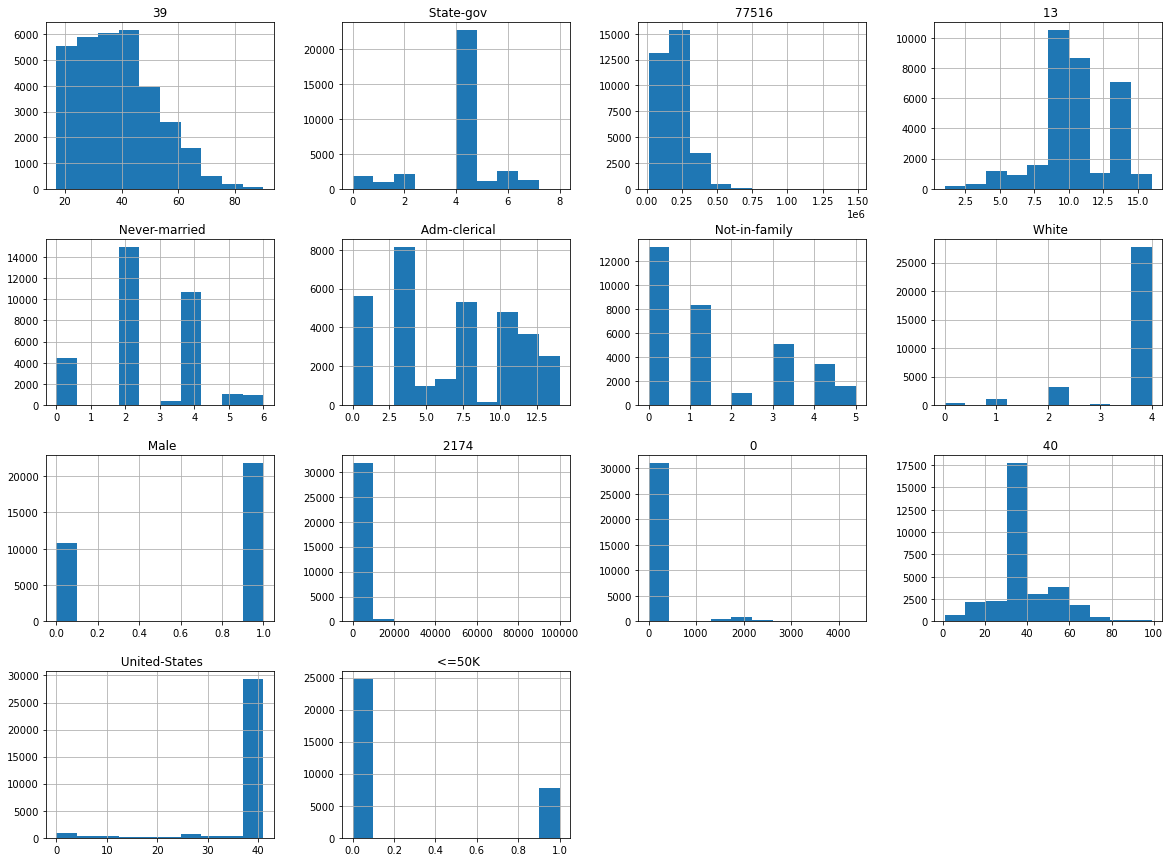

In [15]:
dataset.hist(figsize=(20,15))
plt.show()

In [16]:
dataset.corr()

,39,State-gov,77516,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
39,1.000000,0.003786,-0.076646,0.036527,-0.266292,-0.020946,-0.263698,0.028718,0.088832,0.077674,0.057775,0.068756,-0.001151,0.234039
State-gov,0.003786,1.000000,-0.016587,0.052015,-0.064798,0.255004,-0.090449,0.049720,0.095942,0.033828,0.012231,0.138974,-0.007710,0.051645
77516,-0.076646,-0.016587,1.000000,-0.043159,0.028184,0.001554,0.008922,-0.021278,0.026882,0.000437,-0.010259,-0.018770,-0.051957,-0.009481
13,0.036527,0.052015,-0.043159,1.000000,-0.069338,0.109748,-0.094145,0.031825,0.012256,0.122627,0.079932,0.148127,0.050831,0.335182
Never-married,-0.266292,-0.064798,0.028184,-0.069338,1.000000,-0.009617,0.185461,-0.068025,-0.129337,-0.043398,-0.034182,-0.190521,-0.023827,-0.199295
Adm-clerical,-0.020946,0.255004,0.001554,0.109748,-0.009617,1.000000,-0.075620,0.006779,0.080328,0.025511,0.017979,0.080384,-0.012532,0.075448
Not-in-family,-0.263698,-0.090449,0.008922,-0.094145,0.185461,-0.075620,1.000000,-0.116052,-0.582453,-0.057918,-0.061064,-0.248975,-0.005504,-0.250924
White,0.028718,0.049720,-0.021278,0.031825,-0.068025,0.006779,-0.116052,1.000000,0.087197,0.011143,0.018902,0.041910,0.137849,0.071853
Male,0.088832,0.095942,0.026882,0.012256,-0.129337,0.080328,-0.582453,0.087197,1.000000,0.048477,0.045572,0.229312,-0.008125,0.215995
2174,0.077674,0.033828,0.000437,0.122627,-0.043398,0.025511,-0.057918,0.011143,0.048477,1.000000,-0.031614,0.078409,-0.001984,0.223333


In [17]:

from sklearn.multiclass import OneVsOneClassifier, OneVsRestClassifier 
from sklearn.svm import SVC, LinearSVC
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import precision_score, recall_score

In [18]:
dataset[' <=50K'].value_counts()    

0.0    24719
1.0     7841
Name:  <=50K, dtype: int64

In [19]:
X = dataset.drop(' Bachelors', axis=1)
Y = dataset[' Bachelors']

In [20]:
X.head()

,39,State-gov,77516,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
0,50,6.0,83311,13,2.0,4.0,0.0,4.0,1.0,0,0,13,39.0,0.0
1,38,4.0,215646,9,0.0,6.0,1.0,4.0,1.0,0,0,40,39.0,0.0
2,53,4.0,234721,7,2.0,6.0,0.0,2.0,1.0,0,0,40,39.0,0.0
3,28,4.0,338409,13,2.0,10.0,5.0,2.0,0.0,0,0,40,5.0,0.0
4,37,4.0,284582,14,2.0,4.0,5.0,4.0,0.0,0,0,40,39.0,0.0


In [21]:
Y.count()

32560

In [22]:
Y.value_counts()

 HS-grad         10501
 Some-college     7291
 Bachelors        5354
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name:  Bachelors, dtype: int64

In [23]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=1/3)

In [24]:
svc_clf = SVC(C=0.5, kernel="poly")
svc_clf.fit(X_train, Y_train)

SVC(C=0.5, kernel='poly')

In [25]:
svc_clf.score(X_test, Y_test)

0.31711811313801364

In [26]:
svc_clf = SVC(C=1, kernel="poly")
svc_clf.fit(X_train, Y_train)

SVC(C=1, kernel='poly')

In [27]:
svc_clf.score(X_test, Y_test )

0.3172102450709416

In [28]:
svc_clf = SVC(C=0.01, kernel="poly")
svc_clf.fit(X_train, Y_train)

SVC(C=0.01, kernel='poly')

In [29]:
svc_clf.score(X_test, Y_test)

0.3165653215404459

In [30]:
svc_clf = SVC(C=0.01, kernel="rbf")
svc_clf.fit(X_train, Y_train)

svc_clf.score(X_test, Y_test)

0.3165653215404459

In [31]:
svc_clf = SVC(C=0.4, kernel="rbf")
svc_clf.fit(X_train, Y_train)

svc_clf.score(X_test, Y_test)

0.3172102450709416

In [32]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [33]:
svc_clf = Pipeline([
    ('std_clf', StandardScaler()),
    ('SVC', SVC(C=0.4, kernel="rbf")),
])
svc_clf.fit(X_train, Y_train)
svc_clf.score(X_test, Y_test)

0.9035378662244334

In [34]:
svc_clf = Pipeline([
    ('std_clf', StandardScaler()),
    ('SVC', SVC(C=0.4, kernel="poly")),
])
svc_clf.fit(X_train, Y_train)
svc_clf.score(X_test, Y_test)

0.8322277501381979

In [35]:
svc_clf = Pipeline([
    ('std_clf', StandardScaler()),
    ('SVC', SVC(C=1, kernel="poly")),
])
svc_clf.fit(X_train, Y_train)
svc_clf.score(X_test, Y_test)

0.9321908973650267

In [36]:
svc_clf = Pipeline([
    ('std_clf', StandardScaler()),
    ('SVC', SVC(C=2, kernel="poly")),
])
svc_clf.fit(X_train, Y_train)
svc_clf.score(X_test, Y_test)

0.9670167680117929

In [37]:
svc_clf = Pipeline([
    ('std_clf', StandardScaler()),
    ('SVC', SVC(C=0.01, kernel="poly")),
])
svc_clf.fit(X_train, Y_train)
svc_clf.score(X_test, Y_test)

0.4039063939561452

In [39]:
svc_clf = Pipeline([
    ('std_clf', StandardScaler()),
    ('SVC', SVC(C=0.01, kernel="rbf")),
])
svc_clf.fit(X_train, Y_train)
svc_clf.score(X_test, Y_test)

0.4567901234567901

In [40]:
svc_clf = Pipeline([
    ('std_clf', StandardScaler()),
    ('SVC', SVC(C=2, kernel="rbf")),
])
svc_clf.fit(X_train, Y_train)
svc_clf.score(X_test, Y_test)

0.9739266629813893

In [42]:
svc_clf = Pipeline([
    ('std_clf', StandardScaler()),
    ('SVC', LinearSVC(multi_class='ovr')),
])
svc_clf.fit(X_train, Y_train)
svc_clf.score(X_test, Y_test)

C:\Users\mhose\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


0.5296664824028008

In [46]:
svc_clf = Pipeline([
    ('std_clf', StandardScaler()),
    ('SVC', LinearSVC(multi_class='crammer_singer', dual=True)),
])
svc_clf.fit(X_train, Y_train)
svc_clf.score(X_test, Y_test)

C:\Users\mhose\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


0.9584484982494933

In [47]:
svc_clf = Pipeline([
    ('std_clf', StandardScaler()),
    ('SVC', LinearSVC(multi_class='crammer_singer')),
])
svc_clf.fit(X_train, Y_train)
svc_clf.score(X_test, Y_test)

C:\Users\mhose\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


0.9584484982494933